## **<span style='color:#410CE8'>PERSONAL PAY</span> - SR. DATA SCIENTIST.**

### **1. DESAFÍO PLANTEADO.**

<div style='background-color:rgba(128, 128, 128, 1); color:black; padding:15px; border-radius:10px;'>

A partir de una determinada fuente de información, el objetivo es **predecir si un usuario incurrirá o no en default**. Para ello, se dispone de diversas **características de distintos usuarios a lo largo de un mes determinado**. 

Se comprende, entonces, que:  
&nbsp;&nbsp;i) se trata de un **problema supervisado de clasificación**, con **variable *target* (dependiente) tipo categórica dummy/binaria** (`default` o `no default`);  
&nbsp;&nbsp;ii) se cuenta con **datos de tipo corte transversal** (sin temporalidad asociada - al menos de la variable target).  

</div>

### **2. ENTENDIMIENTO DE LA FUENTE DE INFORMACIÓN.**

#### **2.1. LECTURA INICIAL - TARGET.**

<div style='background-color:rgba(128, 128, 128, 1); color:black; padding:15px; border-radius:10px;'>

El objetivo es **conocer la distribución de la variable target**.  

</div>

In [1]:
# Importación de liberías para procesamiento de información y cálculos adicionales.
import pandas as pd
import numpy as np

# Configuración visualización de DataFrames.
pd.set_option('display.max_columns', None)

In [2]:
# Definición de ruta e inspección de hojas dentro del arhivo .xlsx.
path = r'/home/davidguzzi/projects/personal_pay/Base_Evaluacion_oct_2024 (2) (1).xlsx'
xlsx_cols = pd.ExcelFile(path)

print(f'El archivo .xlsx cuenta con las siguientes hojas: {xlsx_cols.sheet_names}')

El archivo .xlsx cuenta con las siguientes hojas: ['Base', 'Diccionario']


In [3]:
# Lectura de sheet 'Base', donde se encuentra la fuente de información principal.
base = pd.read_excel(path, sheet_name=xlsx_cols.sheet_names[0])
base.head(1)

,ID,cal_nom_afip,edad,lc_monto,lc_monto_c,sco_ser,sco_ser_3m,sco_ser_6m,sco_ser_12m,sco_ser_3m_t,sco_ser_6m_t,sco_ser_12m_t,sco_fin,sco_fin_3m,sco_fin_6m,sco_fin_12m,sco_fin_3m_t,sco_fin_6m_t,sco_fin_12m_t,telcos_cons_3m,telcos_mor_cant,telcos_mor_dda,telcos_mor_ant,telcos_mor_cant2,telcos_dda_mv,telcos_dda_tf,telcos_dda_cl,telcos_dda_tp,telcos_dda_ta,nse_perc,fe,fe_max,compr_mens,rat_cm_nse,pfina_12m,bcra_ant,bcra_sit_vg,bcra_psit_3m,bcra_psit_6m,bcra_psit_12m,bcra_psit_3m_t,bcra_psit_6m_t,bcra_psit_12m_t,bancrzdo,bco_cant,bco_endeu,tc_cant,tc_sdot,che_sf_cant_3m,che_sf_mto_3m,che_sf_cant_6m,che_sf_mto_6m,pre_pre_cant,pre_pre_sldo,pre_hip_cant,pre_hip_sldo,pre_per_cant,pre_per_sldo,pre_otr_cant,pre_otr_sldo,descub_cant,descub_mto,rc_vg_6m,rc_vg_3m,rc_vg,rc_vg_fcap1,rc_vg_fcap2,rc_vg_fcap3,rc_vg_otras,rf_vg_6m,rf_vg_3m,rf_vg,rf_vg_fcap1,rf_vg_fcap2,rf_vg_fcap3,rc_vg_telcos,es_empleado,es_jubilado,es_pensionado,es_monotrib,es_autonomo,es_empleador,es_integ_soc,es_sin_activ,antig_afip,antig_laboral_max,cant_empleados,cod_ganancias,ape_psit,ape_cant_imp_3m,ape_cant_imp_12m,ape_cant_parc_12m,ape_cant_er_12m,aper_psit,aper_cant_imp_3m,aper_cant_imp_12m,aper_cant_parc_12m,art_fpgo,sss_os_cod,bs_posee,com_ext_imp,com_ext_exp,ft_apocrifas,target
0,1,100,37.0,28078,6187,275,275,246,229,0,0,1,NaN,1,1,1,0,0,estable,0,0,0,0,0,0,0,0,0,0,99,0,0,5600,0.17,0,87,1,1,1,5,0,0,positiva,1,0,0,1,56000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,475300,0,0,0,0,0,1,649220,0,0,0,0,0,0,0,0,0,0,1,156,0,0,0,0,0,0,0,0,0,0,0,0,0,111209,0,0,0,0,0


In [4]:
# Normalización de nombres de columnas en 'Base'.
base.columns = (
    base.columns
      .str.strip()
      .str.lower()
      .str.replace(r'[^a-z0-9]+', '_', regex=True)
      .str.strip('_')
)
base.columns

Index(['id', 'cal_nom_afip', 'edad', 'lc_monto', 'lc_monto_c', 'sco_ser',
       'sco_ser_3m', 'sco_ser_6m', 'sco_ser_12m', 'sco_ser_3m_t',
       ...
       'aper_cant_imp_3m', 'aper_cant_imp_12m', 'aper_cant_parc_12m',
       'art_fpgo', 'sss_os_cod', 'bs_posee', 'com_ext_imp', 'com_ext_exp',
       'ft_apocrifas', 'target'],
      dtype='object', length=104)

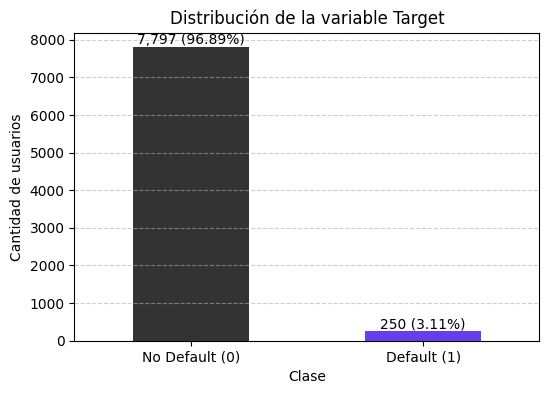

In [5]:
# Dada su importacia, se analiza la distribución de la variable target.
# Numéricamente.
target_dist = base['target'].value_counts()
target_prop = base['target'].value_counts(normalize=True)

# Gráficamente.
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
bars = target_dist.plot(kind='bar', color=['black', '#410CE8'], alpha=0.8)

plt.title('Distribución de la variable Target')
plt.xlabel('Clase')
plt.ylabel('Cantidad de usuarios')
plt.xticks(ticks=[0,1], labels=['No Default (0)', 'Default (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Etiquetas.
for i, v in enumerate(target_dist):
    pct = target_prop[i] * 100
    plt.text(i, v + (max(target_dist)*0.001), 
             f'{v:,} ({pct:.2f}%)', 
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [6]:
# ¿Existen más de un registro para un mismo usuario?
print(f'Dentro de un DataFrame de {base.shape[0]} filas, se poseen {base['id'].nunique()} usuarios únicos.')

Dentro de un DataFrame de 8047 filas, se poseen 8047 usuarios únicos.


<div style='background-color:rgba(65, 12, 232, 0.5); color:white; padding:15px; border-radius:10px;'>

Se observa preliminarmente un **desbalance de clases**. 
Esto condicionará las métricas de evaluación de performance de los modelos. **Accuracy** no será suficientemente informativa, y será más relevante utilizar métricas como **Precision, Recall o F1-score**.  
Por otro lado, y en caso de no obtener resultados satisfactorios, podrán considerarse técnicas de **oversampling o undersampling**.  

</div>

#### **2.2. LECTURA INICIAL - FEATURES.**

<div style='background-color:rgba(128, 128, 128, 1); color:black; padding:15px; border-radius:10px;'>

El objetivo es **utilizar información presente en Diccionario**:

&nbsp;&nbsp;i) solo variables que presenten definición conceptual;  
&nbsp;&nbsp;ii) ajuste en los tipos de datos.

Por último, se analizarán y tratarán **datos nulos/faltantes**.

</div>

In [7]:
# Información general de 'Base'.
base.info(max_cols=105)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 104 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    id                  8047 non-null   int64  
 1    cal_nom_afip        8047 non-null   int64  
 2    edad                8039 non-null   float64
 3    lc_monto            8047 non-null   int64  
 4    lc_monto_c          8047 non-null   int64  
 5    sco_ser             8047 non-null   int64  
 6    sco_ser_3m          8047 non-null   int64  
 7    sco_ser_6m          8047 non-null   int64  
 8    sco_ser_12m         8047 non-null   int64  
 9    sco_ser_3m_t        8047 non-null   int64  
 10   sco_ser_6m_t        8047 non-null   int64  
 11   sco_ser_12m_t       8047 non-null   int64  
 12   sco_fin             7772 non-null   float64
 13   sco_fin_3m          8047 non-null   int64  
 14   sco_fin_6m          8047 non-null   int64  
 15   sco_fin_12m         8047 non-null   

In [8]:
# Para un mejor entendimiento de cada variable, se utiliza la hoja 'Diccionario' del .xlsx.

dic = pd.read_excel(path, sheet_name=xlsx_cols.sheet_names[1])

# Normalización columnas.
dic.columns = (
    dic.columns
      .str.strip()
      .str.lower()
      .str.replace(r'[^a-z0-9]+', '_', regex=True)
      .str.strip('_')
)
dic.columns

Index(['descripcion_cda_web', 'descripcion_cda_batch', 'tipo', 'longtud_max'], dtype='object')

In [9]:
# ¿Qué variables no se encuentran presentes en Diccionario?

dic['descripcion_cda_batch'] = (
    dic['descripcion_cda_batch']
      .str.strip()
      .str.lower()
      .str.replace(r'[^a-z0-9]+', '_', regex=True)
      .str.strip('_')
)

dic['key']  = (dic['descripcion_cda_batch'])

cols_base_set = set(base.columns)
keys_dic_set  = set(dic['key'])

faltantes_en_dic = sorted(cols_base_set - keys_dic_set)

print(f'Columnas de Base NO encontradas en Diccionario: {faltantes_en_dic}.')

Columnas de Base NO encontradas en Diccionario: ['cod_ganancias', 'descub_mto', 'id', 'rc_vg_otras', 'rc_vg_telcos', 'target'].


In [10]:
# Identificación de columnas que no poseen variabilidad y que no serán consideradas.

const_cols = base.columns[base.nunique(dropna=True) <= 1].tolist()
print(f'Columnas sin variabilidad (n={len(const_cols)}): {const_cols}')
base[const_cols].head(1)

Columnas sin variabilidad (n=8): ['fe', 'fe_max', 'pfina_12m', 'rc_vg_otras', 'rf_vg_fcap3', 'rc_vg_telcos', 'cod_ganancias', 'com_ext_exp']


,fe,fe_max,pfina_12m,rc_vg_otras,rf_vg_fcap3,rc_vg_telcos,cod_ganancias,com_ext_exp
0,0,0,0,0,0,0,0,0


In [11]:
# base_f: solo columnas con variabilidad y significado (descub_mto puede ser solo una omisión).
base_f = base.drop(columns=const_cols).copy()

In [12]:
# Mapeo de tipos
mapa_tipos = {
    'moneda': 'float64',
    'entero': 'Int64',     
    'texto': 'str',
    'booleano': 'Int64',   
    'documento': 'Int64',
    'porcentaje': 'float64',
}

dic['tipo'] = (
    dic['tipo']
      .str.strip()
      .str.lower()
)

# Cict columna -> tipo pandas a partir del diccionario.
col2dtype = (
    dic[['descripcion_cda_batch', 'tipo']]
      .dropna()
      .assign(tipo=lambda d: d['tipo'].map(mapa_tipos))
      .set_index('descripcion_cda_batch')['tipo']
      .to_dict()
)

# Ajuste manual.
col2dtype['bcra_psit_12m_t'] = 'str' # Figuraba como Entero, pero es un str/String/Object.
col2dtype['rat_cm_nse'] = 'float64' # Figuraba como Entero, pero es un float.

# Conversión.
for col, dtype in col2dtype.items():
    if col in base.columns and dtype is not None:
        try:
            base[col] = base[col].astype(dtype)
        except Exception:
            base[col] = pd.to_numeric(base[col], errors='coerce').astype(dtype)

# Vemos tipos ajustados.
base.info(max_cols=105)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 104 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    id                  8047 non-null   int64  
 1    cal_nom_afip        8047 non-null   float64
 2    edad                8039 non-null   Int64  
 3    lc_monto            8047 non-null   float64
 4    lc_monto_c          8047 non-null   float64
 5    sco_ser             8047 non-null   Int64  
 6    sco_ser_3m          8047 non-null   Int64  
 7    sco_ser_6m          8047 non-null   Int64  
 8    sco_ser_12m         8047 non-null   Int64  
 9    sco_ser_3m_t        8047 non-null   Int64  
 10   sco_ser_6m_t        8047 non-null   Int64  
 11   sco_ser_12m_t       8047 non-null   Int64  
 12   sco_fin             7772 non-null   Int64  
 13   sco_fin_3m          8047 non-null   Int64  
 14   sco_fin_6m          8047 non-null   Int64  
 15   sco_fin_12m         8047 non-null   

In [13]:
# Por último, analizamos la presencia de datos nulos / faltantes y su posible relación con variable target.
from scipy.stats import chi2_contingency

alpha = 0.05  

null_cols = base.columns[base.isna().any()].tolist()

print(f'Existe presencia de datos nulos en columnas: {null_cols}. Porcentaje:\n')

for col in null_cols:
    pct = base[col].isna().mean() * 100
    print(f' - {col}: {pct:.2f}% nulos')

print(
    '\n¿Existe relación entre la presencia de un dato nulo y la variable target?\n'
    'H₀: No hay relación con target (independiente).\n'
    'H₁: Hay relación con target (no independiente).\n'
    f'Usando α = {alpha}\n'
)

# Resultados Chi-cuadrado
chi_results = []
for col in base.columns.drop('target'):
    tabla = pd.crosstab(base[col].isna(), base['target'])
    if tabla.shape[0] == 2:
        chi2, p, _, _ = chi2_contingency(tabla)
        decision = 'Se rechaza H₀' if p < alpha else 'No se rechaza H₀'
        chi_results.append({'columna': col, 'p_valor': p, 'decision': decision})

chi_results_df = pd.DataFrame(chi_results).sort_values('p_valor')
print(chi_results_df)

Existe presencia de datos nulos en columnas: ['edad', 'sco_fin']. Porcentaje:

 - edad: 0.10% nulos
 - sco_fin: 3.42% nulos

¿Existe relación entre la presencia de un dato nulo y la variable target?
H₀: No hay relación con target (independiente).
H₁: Hay relación con target (no independiente).
Usando α = 0.05

   columna       p_valor          decision
1  sco_fin  1.249439e-13     Se rechaza H₀
0     edad  1.000000e+00  No se rechaza H₀


<div style='background-color:rgba(65, 12, 232, 0.5); color:white; padding:15px; border-radius:10px;'>

De la primera **inspección rápida del conjunto de features**, puede observarse:

- **cantidad de observaciones:** 8.047 filas;  
- **cantidad de potenciales features:** 103 columnas;  
- **definición conceptual:** algunas variables no se encontraban presentes en *sheet "Diccionario"*. Sin embargo, la gran mayoría no presentaba variabilidad (siempre en valor 0), lo cual implica que su eliminación (junto con otras sí presentes pero sin variación) no afectará el desempeño del estudio;  
- **tipo de datos:** algunos features presentaban inconsistencias (`edad` no era float64, por ejemplo). Los mismos fueron ajustados utilizando la información presente en *"Diccionario"*;  
- **datos nulos/faltantes:** se detectó presencia de datos faltantes en variables como `edad` y `sco_fin`. Se analizó su relación con la variable target, para determinar si los mismos son aleatorios o no:  
  - en `edad` no se encontró asociación con el target, por lo que se procederá a imputar los valores faltantes con media/mediana;  
  - en `sco_fin` sí se detectó asociación significativa con el target, por lo cual además de la imputación (se comentará más adelante) se podría generar una nueva variable indicadora (`sco_fin_isnull`) para capturar esta información.  

</div>


El test de Chi-cuadrado de independencia es una prueba estadística diseñada para evaluar si dos variables categóricas están asociadas o son independientes. En el contexto de los nulos, transformamos la información de una columna en una variable dicotómica (“nulo” vs. “no nulo”) y la comparamos con el target. El test calcula la diferencia entre las frecuencias observadas en la tabla de contingencia y las frecuencias esperadas bajo la hipótesis nula (H₀), que sostiene que no existe relación entre la presencia de valores faltantes en una columna y la distribución del target. Un p-valor bajo indica que la discrepancia entre lo observado y lo esperado es lo suficientemente grande como para rechazar H₀, sugiriendo que los nulos están relacionados con el target.

La utilidad de este enfoque es que permite detectar patrones no aleatorios en la ausencia de datos. Si los nulos se distribuyen al azar respecto al target, imputarlos con técnicas estándar (media, mediana, moda, etc.) suele ser suficiente. En cambio, si los nulos están asociados al target, eliminarlos o imputarlos sin más podría ocultar información valiosa. En estos casos, es buena práctica crear una variable indicadora de “nulo” que capture esa señal y la conserve en el modelo

### **3. PROCESAMIENTO POR GRUPO DE VARIABLES.**

In [ ]:
# Formar grupos. Se excluyen las tendencias.

GROUPS = {
    'socioeconomico': [
        'edad','nse_perc', 'cal_nom_afip'
    ],
    'limites_compromisos': [
        'lc_monto','lc_monto_c','compr_mens','rat_cm_nse'
    ],
    'scores_servicio': [
        'sco_ser','sco_ser_3m','sco_ser_6m','sco_ser_12m'
    ],
    'scores_financiero': [
        'sco_fin','sco_fin_3m','sco_fin_6m','sco_fin_12m'
    ],
    'telcos_cant': [
        'telcos_cons_3m','telcos_mor_cant','telcos_mor_ant','telcos_mor_cant2'
    ],
    'telcos_dda': [
        'telcos_mor_dda', 'telcos_dda_mv','telcos_dda_tf','telcos_dda_cl',
        'telcos_dda_tp','telcos_dda_ta'
    ],
    'bcra': [
        'bcra_ant','bcra_sit_vg','bcra_psit_3m','bcra_psit_6m','bcra_psit_12m'
    ],
    'bancarizacion': [
        'bancrzdo','bco_cant','bco_endeu'
    ],
    'tarjetas':[
        'tc_cant','tc_sdot'
    ],
    'cheques_cant': [
        'che_sf_cant_3m','che_sf_cant_6m','che_sf_mto_6m'
    ],
    'cheques_mto': [
        'che_sf_mto_3m','che_sf_mto_6m'
    ],
    'prestamos_cant': [
        'pre_pre_cant','pre_hip_cant', 'pre_per_cant','pre_otr_cant'
    ],
    'prestamos_sldo': [
        'pre_pre_sldo','pre_hip_sldo', 'pre_per_sldo', 'pre_otr_sldo'
    ],
    'descubiertos': [
        'descub_cant','descub_mto'
    ],
    'rc': [
        'rc_vg_6m','rc_vg_3m','rc_vg','rc_vg_fcap1','rc_vg_fcap2','rc_vg_fcap3'
    ],
    'rf': [
        'rf_vg_6m','rf_vg_3m','rf_vg','rf_vg_fcap1','rf_vg_fcap2'
    ],
    'laboral_afip': [
        'es_empleado','es_jubilado','es_pensionado','es_monotrib','es_autonomo',
        'es_empleador','es_integ_soc','es_sin_activ',
        'antig_afip','antig_laboral_max','cant_empleados'
    ],
    'ape_aper': [
        'ape_psit','ape_cant_imp_3m','ape_cant_imp_12m','ape_cant_parc_12m','ape_cant_er_12m',
        'aper_psit','aper_cant_imp_3m','aper_cant_imp_12m','aper_cant_parc_12m'
    ],
    'otros_flags': [
        'art_fpgo','sss_os_cod','bs_posee','com_ext_imp','ft_apocrifas'
    ]
}

ID_COL = 'id'
TARGET_COL = 'target'

In [15]:
from utils import build_group_dfs, crosstabs_vs_target, binned_crosstab_vs_target, plot_pairplot, plot_boxplots, smart_crosstab_vs_target

group_dfs = build_group_dfs(base_f, GROUPS)
print(group_dfs.keys())

dict_keys(['socioeconomico', 'limites_compromisos', 'scores_servicio', 'scores_financiero', 'telcos_cant', 'telcos_dda', 'bcra', 'bancarizacion', 'tarjetas', 'cheques_cant', 'cheques_mto', 'prestamos_cant', 'prestamos_sldo', 'descubiertos', 'rc', 'rf', 'laboral_afip', 'ape_aper', 'otros_flags'])


In [16]:
df_socioeconomico = group_dfs['socioeconomico']
display(df_socioeconomico.head(1))

# Crosstabs para columnas binarias/categóricas.
ctabs = crosstabs_vs_target(df_socioeconomico)
for col, ct in ctabs.items():
    print(f'\n=== Crosstab {col} vs {TARGET_COL} ===')
    display(ct)

# Bins por cuantiles + tasa de default (para numéricas).
numeric_cols = [
    c for c in df_socioeconomico.columns
    if c not in [ID_COL, TARGET_COL] and pd.api.types.is_numeric_dtype(df_socioeconomico[c])
]

for col in numeric_cols:
    print(f'\n=== {col}: bins por cuantiles y default rate ===')
    display(binned_crosstab_vs_target(df_socioeconomico, col, q=10))

,id,target,edad,nse_perc,cal_nom_afip
0,1,0,37.0,99,100



=== edad: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[18.0, 26.0]",941,65,1006,0.064612
1,"[26.0, 29.0]",723,33,756,0.043651
2,"[29.0, 32.0]",850,30,880,0.034091
3,"[32.0, 35.0]",780,23,803,0.028643
4,"[35.0, 38.0]",730,17,747,0.022758
5,"[38.0, 41.0]",662,19,681,0.027900
6,"[41.0, 45.0]",794,21,815,0.025767
7,"[45.0, 50.0]",807,13,820,0.015854
8,"[50.0, 57.0]",745,8,753,0.010624



=== nse_perc: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 18.0]",874,10,884,0.011312
1,"[18.0, 28.0]",732,12,744,0.016129
2,"[28.0, 43.0]",834,10,844,0.011848
3,"[43.0, 53.0]",792,11,803,0.013699
4,"[53.0, 65.0]",799,16,815,0.019632
5,"[65.0, 77.0]",777,28,805,0.034783
6,"[77.0, 88.0]",721,30,751,0.039947
7,"[88.0, 96.0]",775,30,805,0.037267
8,"[96.0, 100.0]",1493,103,1596,0.064536



=== cal_nom_afip: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 100.0]",7797,250,8047,0.031067
All,NaN,7797,250,8047,NaN


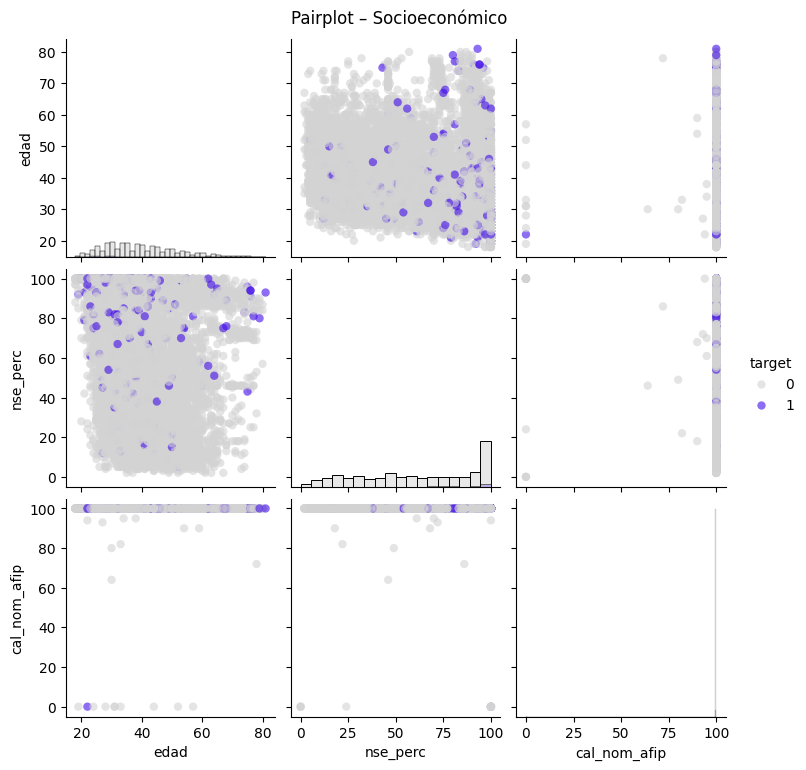

In [17]:
plot_pairplot(df_socioeconomico, gname="Socioeconómico")

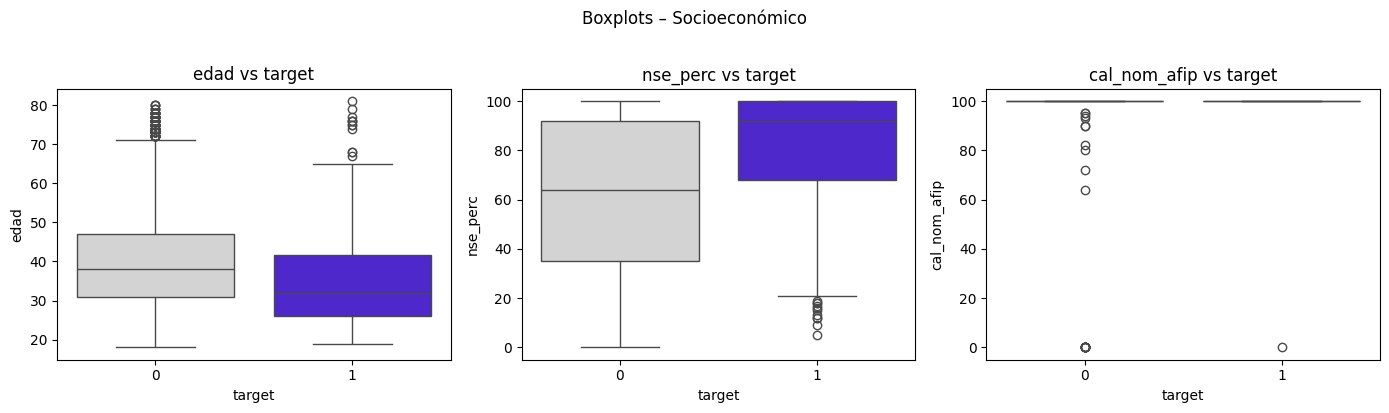

In [18]:
plot_boxplots(df_socioeconomico, gname="Socioeconómico")

In [19]:
df_limites_compromisos = group_dfs['limites_compromisos']
display(df_limites_compromisos.head(1))

# Crosstabs para columnas binarias/categóricas.
ctabs = crosstabs_vs_target(df_limites_compromisos)
for col, ct in ctabs.items():
    print(f'\n=== Crosstab {col} vs {TARGET_COL} ===')
    display(ct)

# Bins por cuantiles + tasa de default (para numéricas).
numeric_cols = [
    c for c in df_limites_compromisos.columns
    if c not in [ID_COL, TARGET_COL] and pd.api.types.is_numeric_dtype(df_limites_compromisos[c])
]

for col in numeric_cols:
    print(f'\n=== {col}: bins por cuantiles y default rate ===')
    display(binned_crosstab_vs_target(df_limites_compromisos, col, q=10))

,id,target,lc_monto,lc_monto_c,compr_mens,rat_cm_nse
0,1,0,28078,6187,5600,0.17



=== lc_monto: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-3152413.0, 22536.0]",756,53,809,0.065513
1,"[22536.0, 31781.4]",751,50,801,0.062422
2,"[31781.4, 48564.6]",777,27,804,0.033582
3,"[48564.6, 74893.0]",775,30,805,0.037267
4,"[74893.0, 97215.0]",780,25,805,0.031056
5,"[97215.0, 114685.4]",783,21,804,0.026119
6,"[114685.4, 138300.6]",790,15,805,0.018634
7,"[138300.6, 174552.2]",793,11,804,0.013682
8,"[174552.2, 238326.8]",795,10,805,0.012422



=== lc_monto_c: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-3304507.0, -7481.8]",780,25,805,0.031056
1,"[-7481.8, 4755.8]",768,37,805,0.045963
2,"[4755.8, 8233.0]",771,47,818,0.057457
3,"[8233.0, 12285.0]",751,40,791,0.050569
4,"[12285.0, 19329.0]",782,23,805,0.028571
5,"[19329.0, 27960.8]",780,24,804,0.029851
6,"[27960.8, 35604.0]",782,23,805,0.028571
7,"[35604.0, 46635.8]",792,12,804,0.014925
8,"[46635.8, 65517.4]",793,12,805,0.014907



=== compr_mens: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 700.0]",761,47,808,0.058168
1,"[700.0, 2700.0]",767,46,813,0.056581
2,"[2700.0, 5300.0]",770,24,794,0.030227
3,"[5300.0, 8600.0]",785,24,809,0.029666
4,"[8600.0, 12834.0]",786,14,800,0.017500
5,"[12834.0, 18352.8]",780,24,804,0.029851
6,"[18352.8, 25868.6]",784,21,805,0.026087
7,"[25868.6, 38490.8]",785,19,804,0.023632
8,"[38490.8, 63376.8]",790,15,805,0.018634



=== rat_cm_nse: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 0.01]",846,48,894,0.053691
1,"[0.01, 0.03]",706,22,728,0.030220
2,"[0.03, 0.06]",970,20,990,0.020202
3,"[0.06, 0.08]",649,17,666,0.025526
4,"[0.08, 0.11]",772,35,807,0.043371
5,"[0.11, 0.15]",800,14,814,0.017199
6,"[0.15, 0.2]",753,22,775,0.028387
7,"[0.2, 0.28]",776,19,795,0.023899
8,"[0.28, 0.43]",767,24,791,0.030341


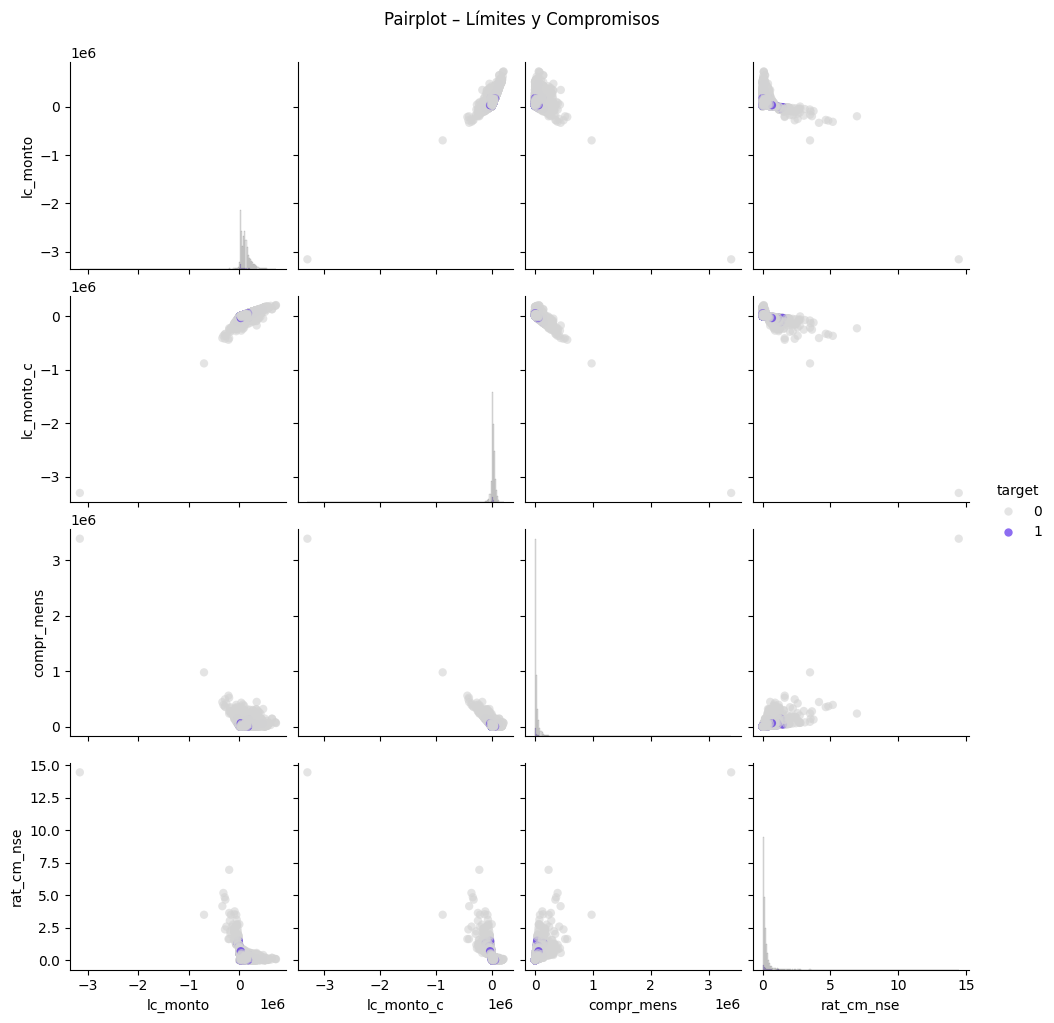

In [20]:
plot_pairplot(df_limites_compromisos, gname="Límites y Compromisos")

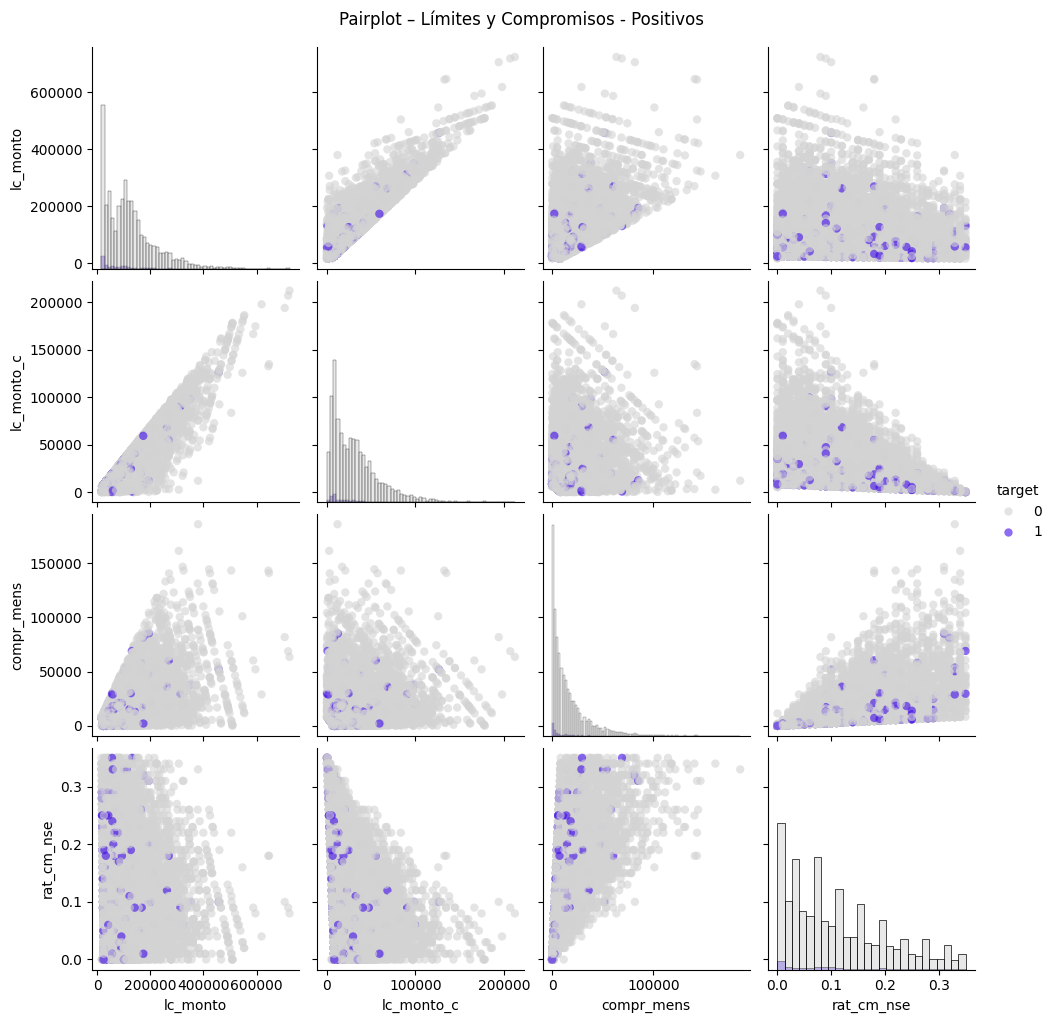

In [21]:
df_limites_compromisos_p = df_limites_compromisos[(df_limites_compromisos['lc_monto']>0) & (df_limites_compromisos['lc_monto_c']>0)]
plot_pairplot(df_limites_compromisos_p, gname="Límites y Compromisos - Positivos")

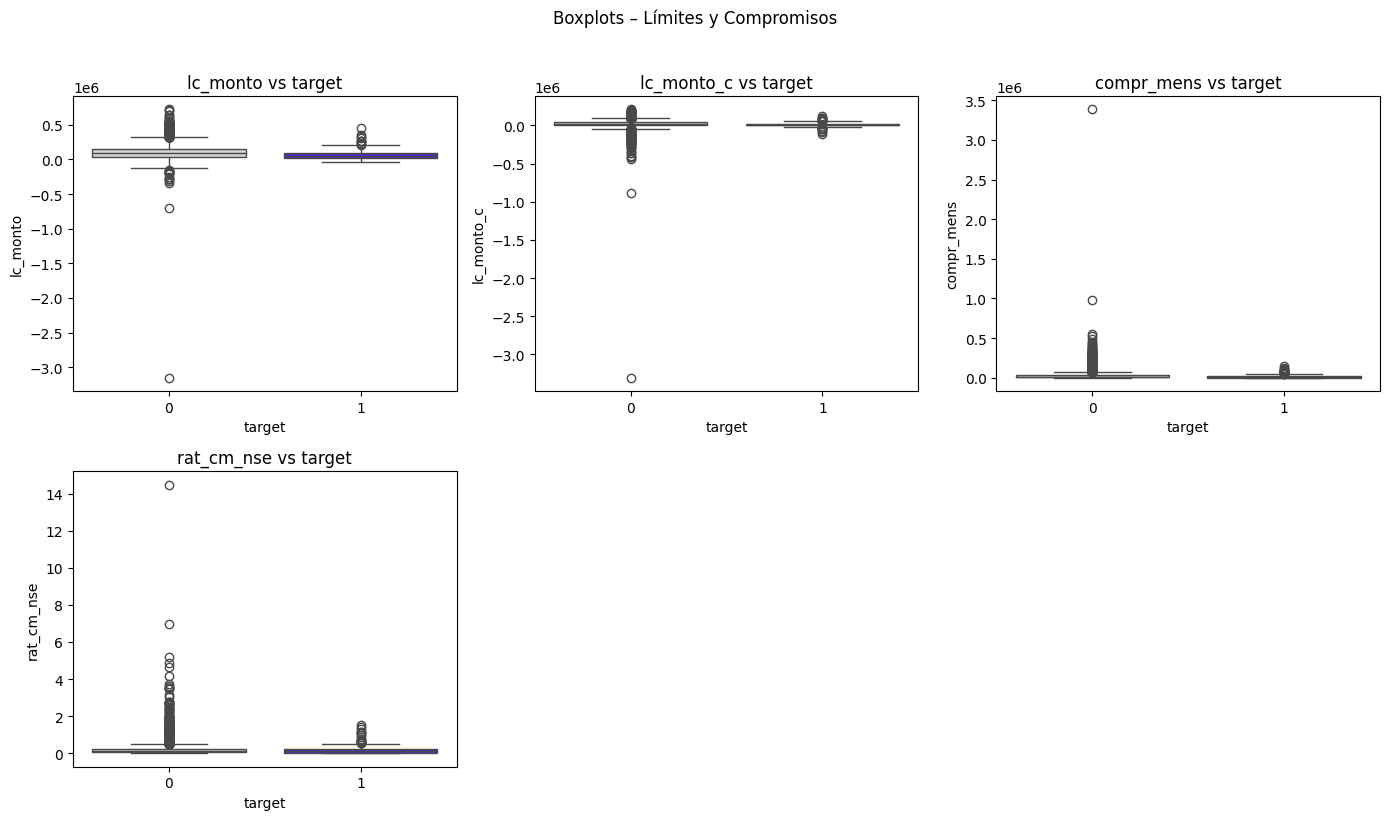

In [22]:
plot_boxplots(df_limites_compromisos, gname="Límites y Compromisos")

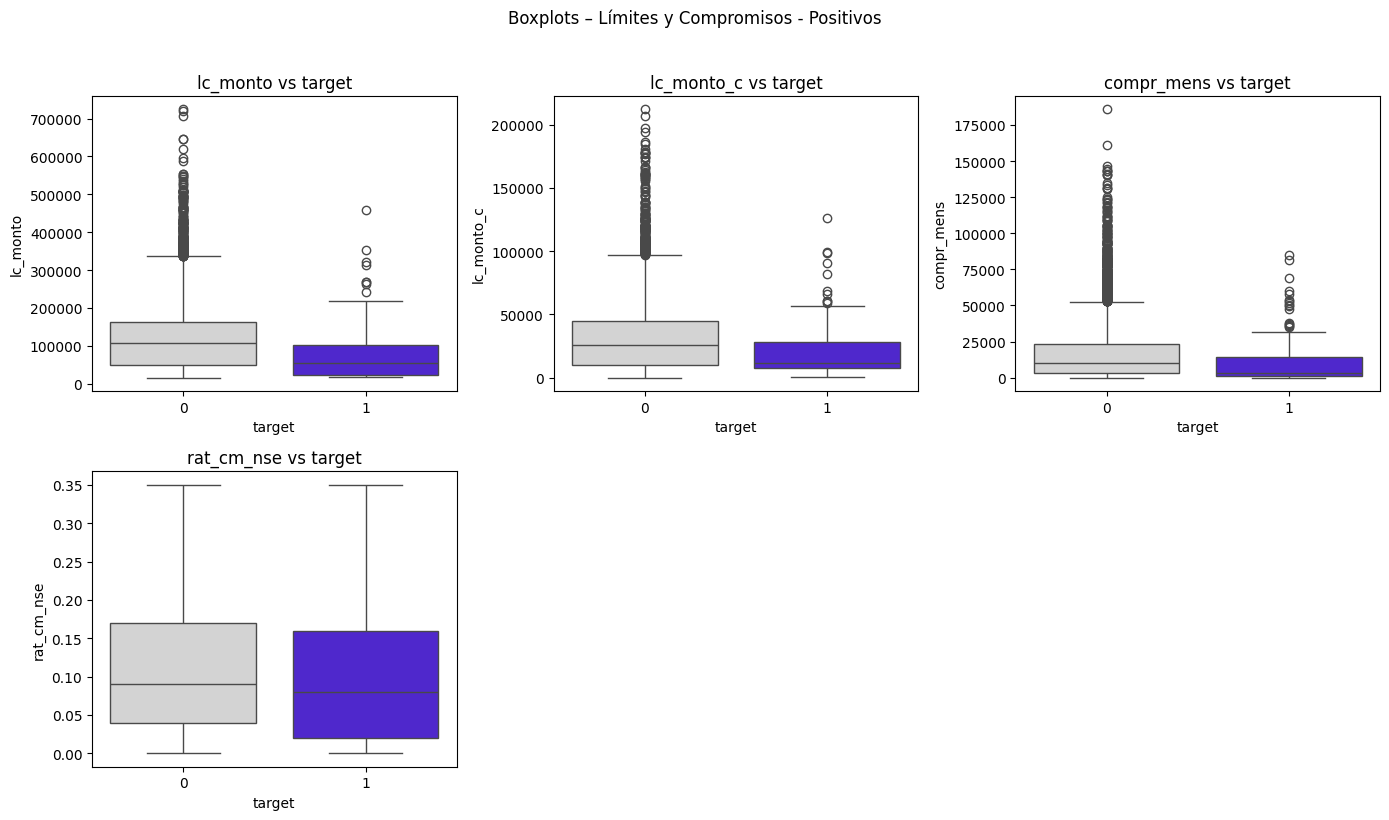

In [23]:
plot_boxplots(df_limites_compromisos_p, gname="Límites y Compromisos - Positivos")

In [24]:
df_sco_servicio = group_dfs['scores_servicio']
display(df_sco_servicio.head(1))

# Crosstabs para columnas binarias/categóricas.
ctabs = crosstabs_vs_target(df_sco_servicio)
for col, ct in ctabs.items():
    print(f'\n=== Crosstab {col} vs {TARGET_COL} ===')
    display(ct)

# Bins por cuantiles + tasa de default (para numéricas).
numeric_cols = [
    c for c in df_sco_servicio.columns
    if c not in [ID_COL, TARGET_COL] and pd.api.types.is_numeric_dtype(df_sco_servicio[c])
]

for col in numeric_cols:
    print(f'\n=== {col}: bins por cuantiles y default rate ===')
    display(binned_crosstab_vs_target(df_sco_servicio, col, q=10))

,id,target,sco_ser,sco_ser_3m,sco_ser_6m,sco_ser_12m
0,1,0,275,275,246,229



=== sco_ser: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 441.0]",738,74,812,0.091133
1,"[441.0, 533.2]",751,47,798,0.058897
2,"[533.2, 610.0]",782,28,810,0.034568
3,"[610.0, 679.0]",774,26,800,0.032500
4,"[679.0, 745.0]",783,24,807,0.029740
5,"[745.0, 811.0]",789,13,802,0.016209
6,"[811.0, 875.0]",799,14,813,0.017220
7,"[875.0, 942.0]",790,8,798,0.010025
8,"[942.0, 999.0]",1591,16,1607,0.009956



=== sco_ser_3m: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 417.0]",732,80,812,0.098522
1,"[417.0, 513.0]",762,44,806,0.054591
2,"[513.0, 590.0]",773,25,798,0.031328
3,"[590.0, 665.0]",790,24,814,0.029484
4,"[665.0, 735.0]",772,27,799,0.033792
5,"[735.0, 803.0]",798,15,813,0.018450
6,"[803.0, 873.0]",780,13,793,0.016393
7,"[873.0, 943.0]",817,5,822,0.006083
8,"[943.0, 999.0]",1573,17,1590,0.010692



=== sco_ser_6m: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 411.0]",730,84,814,0.103194
1,"[411.0, 507.0]",763,40,803,0.049813
2,"[507.0, 589.0]",778,25,803,0.031133
3,"[589.0, 664.0]",781,28,809,0.034611
4,"[664.0, 735.0]",771,26,797,0.032622
5,"[735.0, 801.0]",809,9,818,0.011002
6,"[801.0, 874.0]",781,16,797,0.020075
7,"[874.0, 945.0]",802,7,809,0.008653
8,"[945.0, 999.0]",1582,15,1597,0.009393



=== sco_ser_12m: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 385.0]",730,85,815,0.104294
1,"[385.0, 489.2]",747,48,795,0.060377
2,"[489.2, 579.0]",790,22,812,0.027094
3,"[579.0, 657.0]",783,26,809,0.032138
4,"[657.0, 730.0]",776,23,799,0.028786
5,"[730.0, 800.0]",791,8,799,0.010013
6,"[800.0, 873.0]",797,16,813,0.019680
7,"[873.0, 944.0]",793,5,798,0.006266
8,"[944.0, 999.0]",1590,17,1607,0.010579


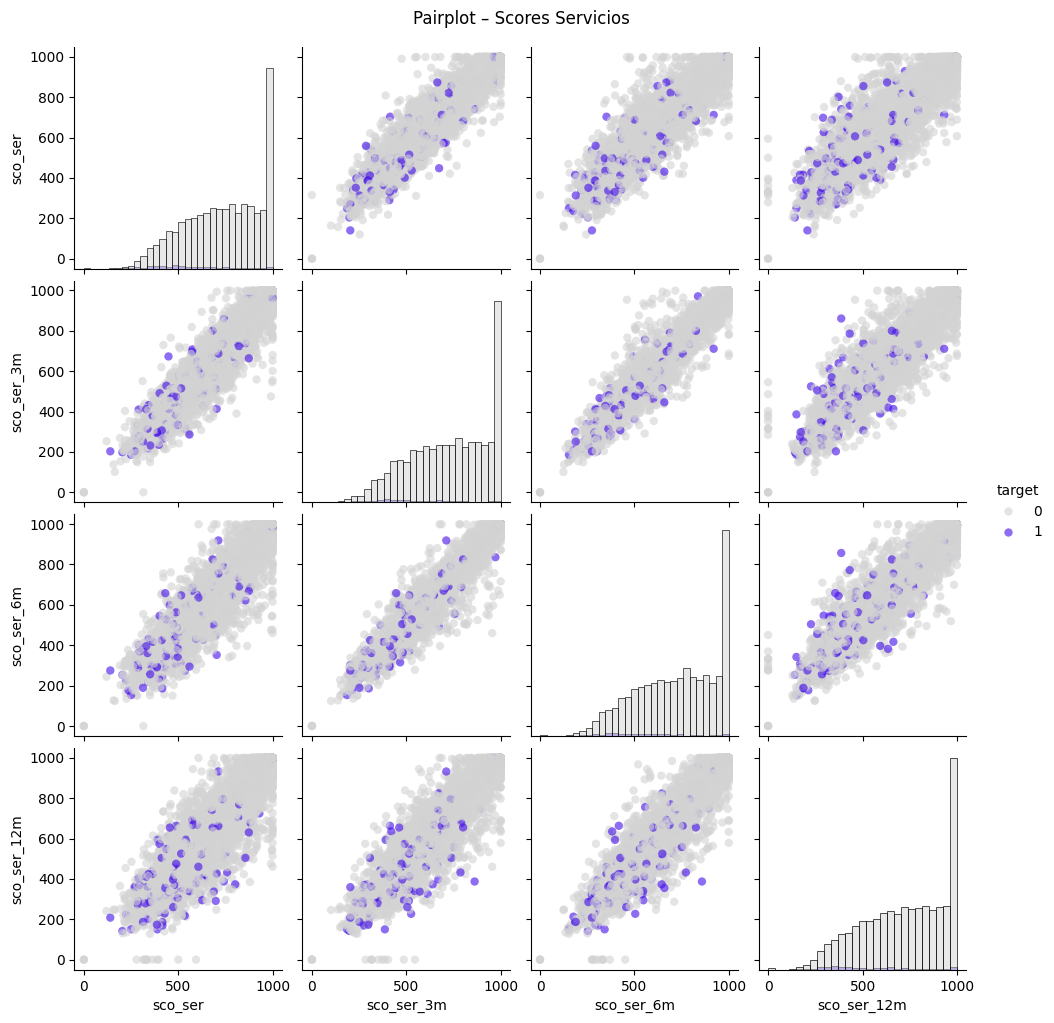

In [25]:
plot_pairplot(df_sco_servicio, gname="Scores Servicios")

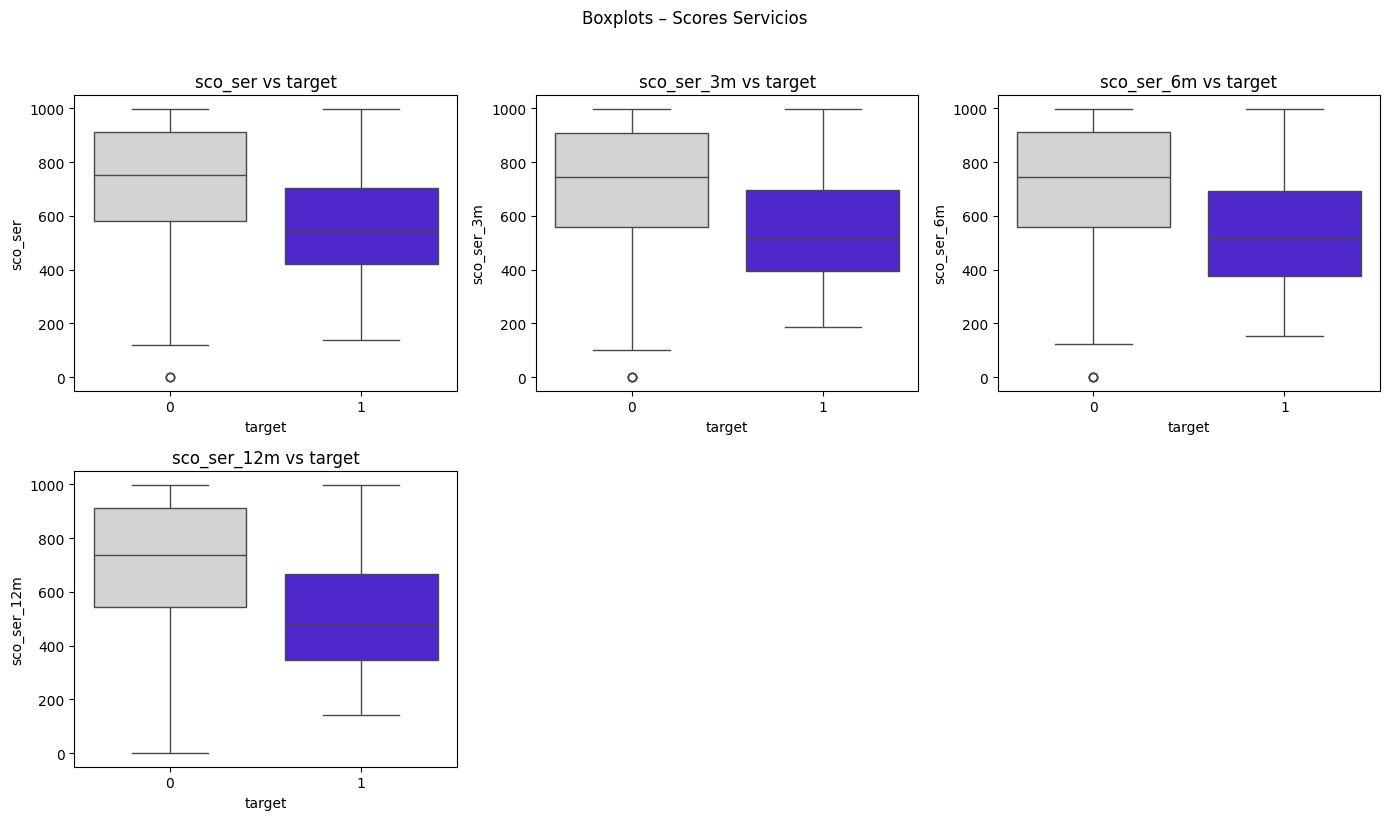

In [26]:
plot_boxplots(df_sco_servicio, gname="Scores Servicios")

In [27]:
df_sco_financiero = group_dfs['scores_financiero']
display(df_sco_financiero.head(1))

# Crosstabs para columnas binarias/categóricas.
ctabs = crosstabs_vs_target(df_sco_financiero)
for col, ct in ctabs.items():
    print(f'\n=== Crosstab {col} vs {TARGET_COL} ===')
    display(ct)

# Bins por cuantiles + tasa de default (para numéricas).
numeric_cols = [
    c for c in df_sco_financiero.columns
    if c not in [ID_COL, TARGET_COL] and pd.api.types.is_numeric_dtype(df_sco_financiero[c])
]

for col in numeric_cols:
    print(f'\n=== {col}: bins por cuantiles y default rate ===')
    display(binned_crosstab_vs_target(df_sco_financiero, col, q=10))

,id,target,sco_fin,sco_fin_3m,sco_fin_6m,sco_fin_12m
0,1,0,NaN,1,1,1



=== sco_fin: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 195.0]",733,48,781,0.061460
1,"[195.0, 274.0]",735,46,781,0.058899
2,"[274.0, 343.0]",746,28,774,0.036176
3,"[343.0, 403.0]",744,32,776,0.041237
4,"[403.0, 463.0]",770,16,786,0.020356
5,"[463.0, 525.0]",763,13,776,0.016753
6,"[525.0, 588.0]",762,9,771,0.011673
7,"[588.0, 654.0]",766,12,778,0.015424
8,"[654.0, 738.9]",764,7,771,0.009079



=== sco_fin_3m: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 129.6]",737,68,805,0.084472
1,"[129.6, 230.0]",767,43,810,0.053086
2,"[230.0, 306.0]",778,33,811,0.040691
3,"[306.0, 373.4]",761,32,793,0.040353
4,"[373.4, 438.0]",790,25,815,0.030675
5,"[438.0, 505.0]",790,12,802,0.014963
6,"[505.0, 573.0]",786,13,799,0.016270
7,"[573.0, 643.0]",795,11,806,0.013648
8,"[643.0, 731.4]",796,5,801,0.006242



=== sco_fin_6m: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 129.0]",749,61,810,0.075309
1,"[129.0, 233.0]",753,52,805,0.064596
2,"[233.0, 304.0]",779,30,809,0.037083
3,"[304.0, 377.4]",757,38,795,0.047799
4,"[377.4, 442.0]",791,19,810,0.023457
5,"[442.0, 508.0]",790,10,800,0.012500
6,"[508.0, 576.0]",792,17,809,0.021014
7,"[576.0, 648.0]",803,8,811,0.009864
8,"[648.0, 735.0]",790,6,796,0.007538



=== sco_fin_12m: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 117.0]",745,69,814,0.084767
1,"[117.0, 222.0]",756,50,806,0.062035
2,"[222.0, 302.0]",771,28,799,0.035044
3,"[302.0, 373.0]",771,35,806,0.043424
4,"[373.0, 443.0]",791,19,810,0.023457
5,"[443.0, 510.0]",793,11,804,0.013682
6,"[510.0, 580.2]",782,12,794,0.015113
7,"[580.2, 648.0]",796,11,807,0.013631
8,"[648.0, 740.0]",802,6,808,0.007426


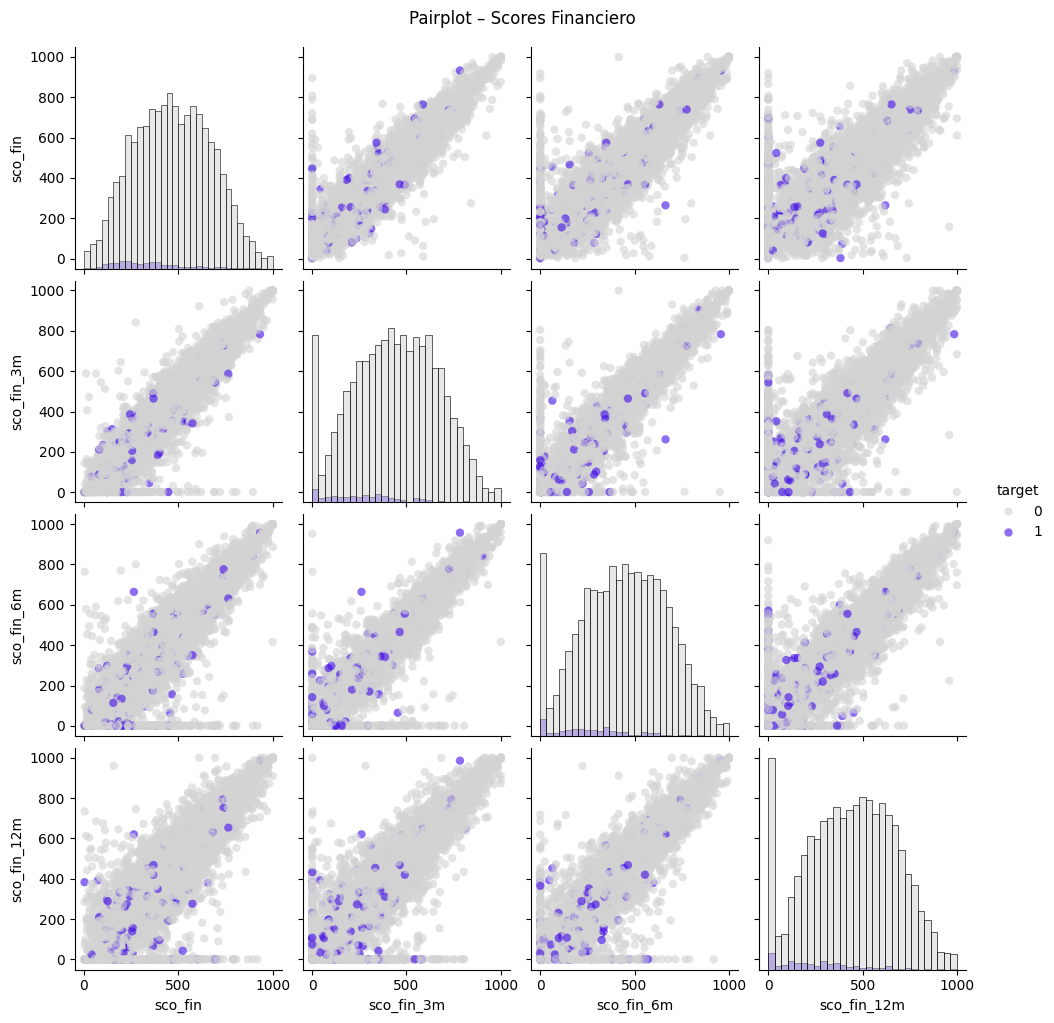

In [28]:
plot_pairplot(df_sco_financiero, gname="Scores Financiero")

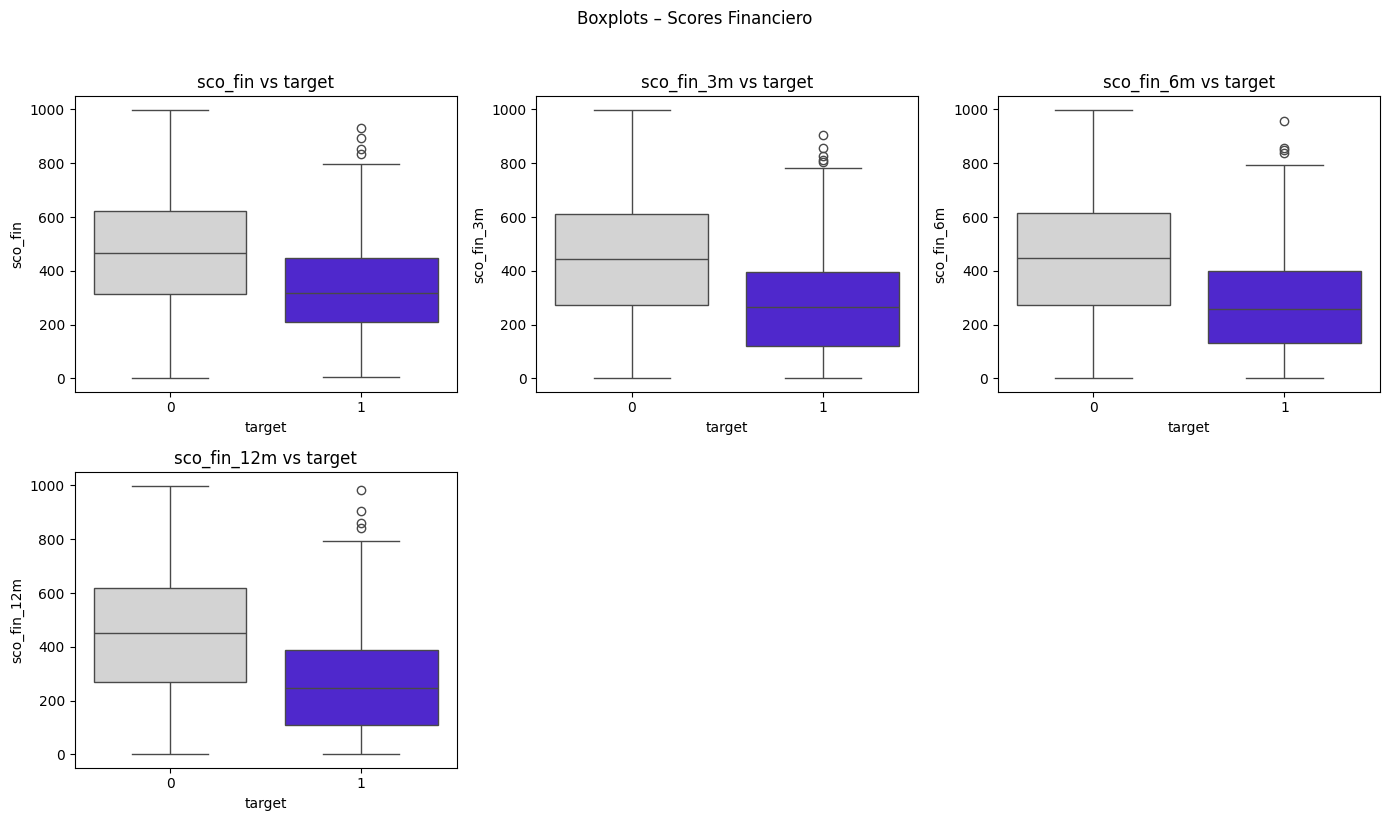

In [29]:
plot_boxplots(df_sco_financiero, gname="Scores Financiero")

In [30]:
df_telcos_cant = group_dfs['telcos_cant']
display(df_telcos_cant.head(1))

# Crosstabs para columnas binarias/categóricas.
ctabs = crosstabs_vs_target(df_telcos_cant)
for col, ct in ctabs.items():
    print(f'\n=== Crosstab {col} vs {TARGET_COL} ===')
    display(ct)

# Bins por cuantiles + tasa de default (para numéricas).
numeric_cols = [
    c for c in df_telcos_cant.columns
    if c not in [ID_COL, TARGET_COL] and pd.api.types.is_numeric_dtype(df_telcos_cant[c])
]

for col in numeric_cols:
    print(f'\n=== {col}: bins por cuantiles y default rate ===')
    display(binned_crosstab_vs_target(df_telcos_cant, col, q=10))

,id,target,telcos_cons_3m,telcos_mor_cant,telcos_mor_ant,telcos_mor_cant2
0,1,0,0,0,0,0



=== telcos_cons_3m: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 6.0]",7797,250,8047,0.031067
All,NaN,7797,250,8047,NaN



=== telcos_mor_cant: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 3.0]",7797,250,8047,0.031067
All,NaN,7797,250,8047,NaN



=== telcos_mor_ant: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 2606.0]",7797,250,8047,0.031067
All,NaN,7797,250,8047,NaN



=== telcos_mor_cant2: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 13.0]",7797,250,8047,0.031067
All,NaN,7797,250,8047,NaN


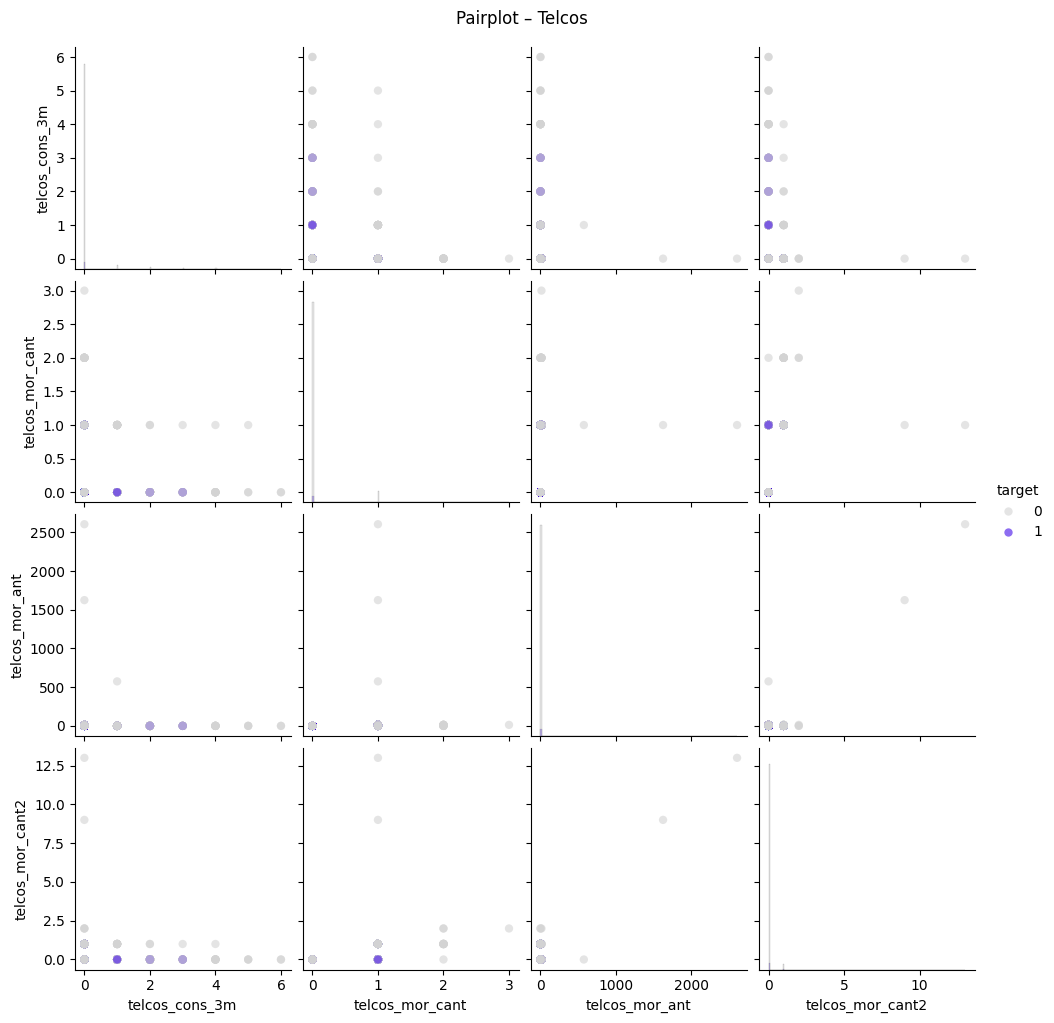

In [31]:
plot_pairplot(df_telcos_cant, gname="Telcos")

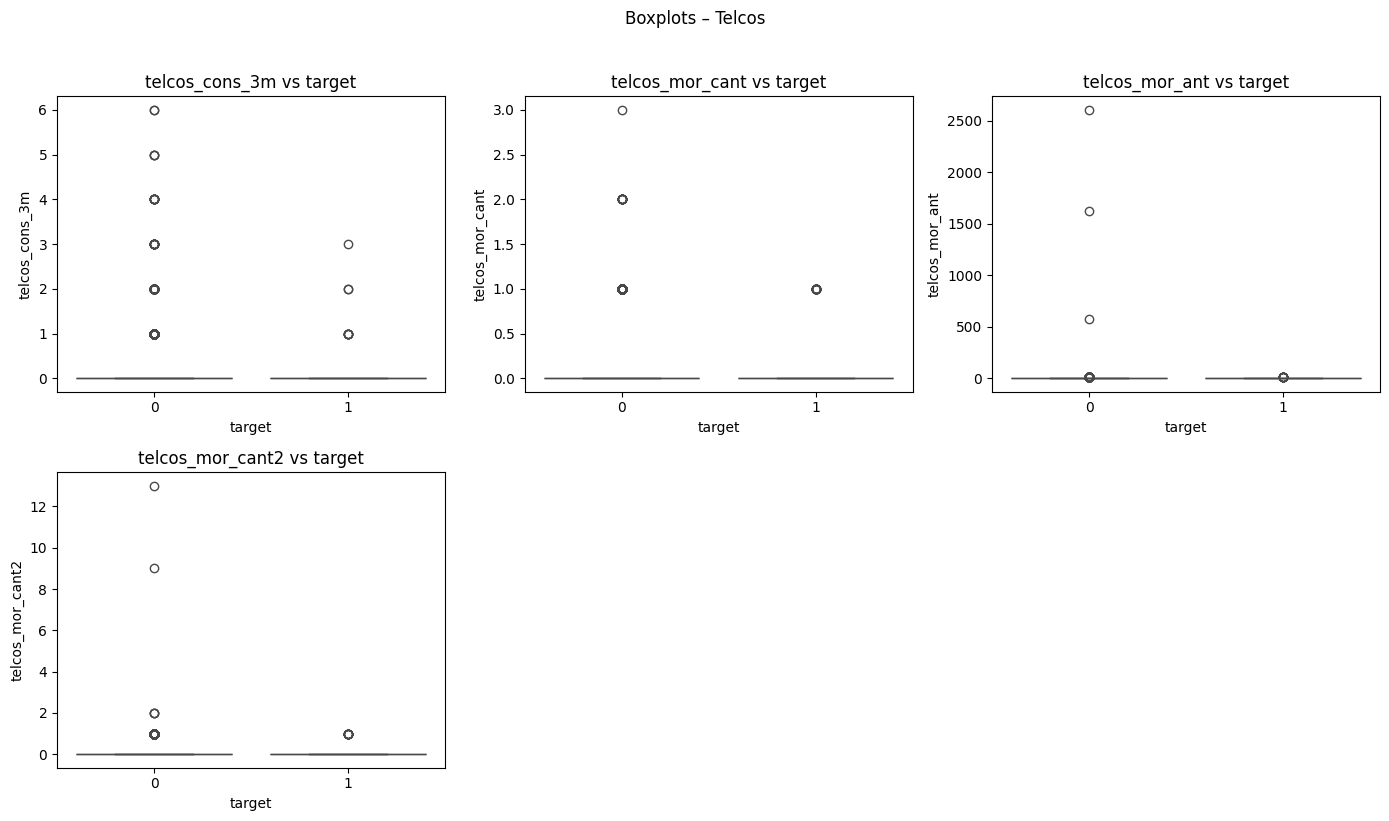

In [32]:
plot_boxplots(df_telcos_cant, gname="Telcos")

In [33]:
df_telcos_dda = group_dfs['telcos_dda']
display(df_telcos_dda.head(1))

# Crosstabs para columnas binarias/categóricas.
ctabs = crosstabs_vs_target(df_telcos_dda)
for col, ct in ctabs.items():
    print(f'\n=== Crosstab {col} vs {TARGET_COL} ===')
    display(ct)

# Bins por cuantiles + tasa de default (para numéricas).
numeric_cols = [
    c for c in df_telcos_dda.columns
    if c not in [ID_COL, TARGET_COL] and pd.api.types.is_numeric_dtype(df_telcos_dda[c])
]

for col in numeric_cols:
    print(f'\n=== {col}: bins por cuantiles y default rate ===')
    display(binned_crosstab_vs_target(df_telcos_dda, col, q=10))

,id,target,telcos_mor_dda,telcos_dda_mv,telcos_dda_tf,telcos_dda_cl,telcos_dda_tp,telcos_dda_ta
0,1,0,0,0,0,0,0,0



=== telcos_mor_dda: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 102998.0]",7797,250,8047,0.031067
All,NaN,7797,250,8047,NaN



=== telcos_dda_mv: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 49046.0]",7797,250,8047,0.031067
All,NaN,7797,250,8047,NaN



=== telcos_dda_tf: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 43348.0]",7797,250,8047,0.031067
All,NaN,7797,250,8047,NaN



=== telcos_dda_cl: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 26386.0]",7797,250,8047,0.031067
All,NaN,7797,250,8047,NaN



=== telcos_dda_tp: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 102998.0]",7797,250,8047,0.031067
All,NaN,7797,250,8047,NaN



=== telcos_dda_ta: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 7277.0]",7797,250,8047,0.031067
All,NaN,7797,250,8047,NaN


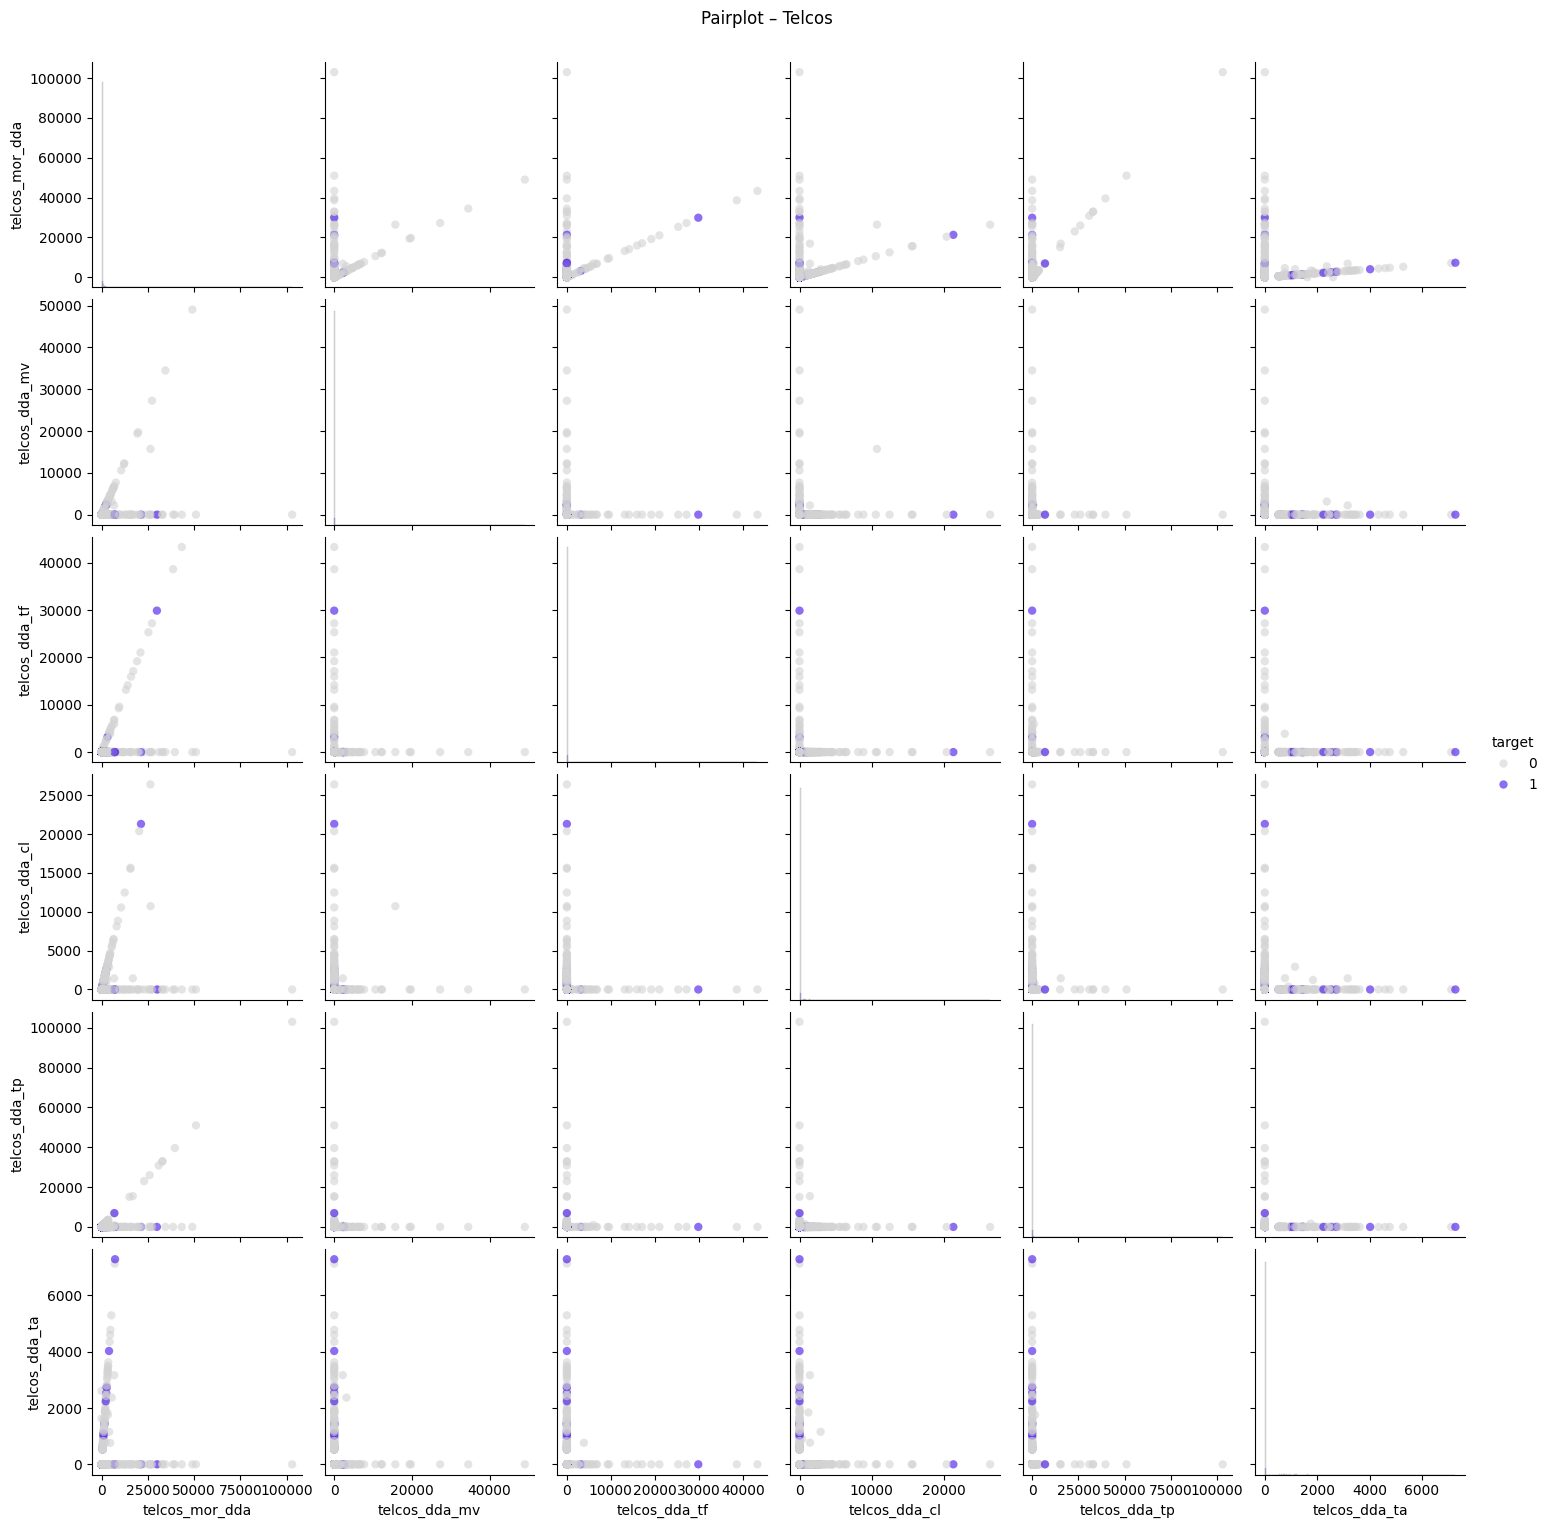

In [34]:
plot_pairplot(df_telcos_dda, gname="Telcos")

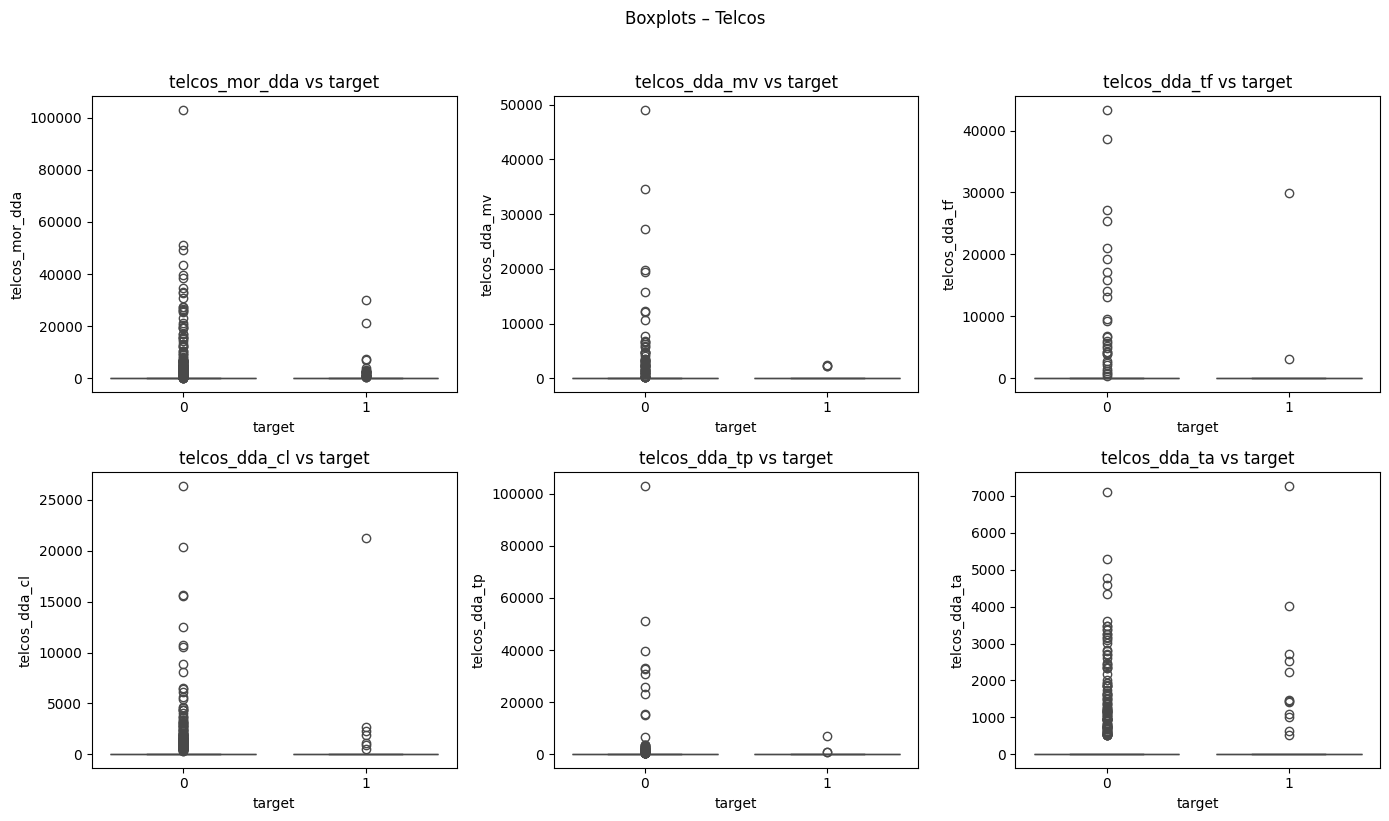

In [35]:
plot_boxplots(df_telcos_dda, gname="Telcos")

In [36]:
df_bcra = group_dfs['bcra']
display(df_bcra.head(1))

# Crosstabs para columnas binarias/categóricas.
ctabs = crosstabs_vs_target(df_bcra)
for col, ct in ctabs.items():
    print(f'\n=== Crosstab {col} vs {TARGET_COL} ===')
    display(ct)

# Bins por cuantiles + tasa de default (para numéricas).
numeric_cols = [
    c for c in df_bcra.columns
    if c not in [ID_COL, TARGET_COL] and pd.api.types.is_numeric_dtype(df_bcra[c])
]

for col in numeric_cols:
    print(f'\n=== {col}: bins por cuantiles y default rate ===')
    display(binned_crosstab_vs_target(df_bcra, col, q=10))

,id,target,bcra_ant,bcra_sit_vg,bcra_psit_3m,bcra_psit_6m,bcra_psit_12m
0,1,0,87,1,1,1,5



=== bcra_ant: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 15.0]",795,60,855,0.070175
1,"[15.0, 38.0]",728,34,762,0.044619
2,"[38.0, 66.0]",797,29,826,0.035109
3,"[66.0, 85.0]",778,27,805,0.033540
4,"[85.0, 107.0]",771,19,790,0.024051
5,"[107.0, 138.0]",779,22,801,0.027466
6,"[138.0, 169.0]",799,17,816,0.020833
7,"[169.0, 202.0]",783,17,800,0.021250
8,"[202.0, 233.0]",798,14,812,0.017241



=== bcra_sit_vg: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 1.0]",7721,240,7961,0.030147
1,"[1.0, 5.0]",76,10,86,0.116279
All,NaN,7797,250,8047,NaN



=== bcra_psit_3m: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 1.0]",7663,237,7900,0.030000
1,"[1.0, 5.0]",134,13,147,0.088435
All,NaN,7797,250,8047,NaN



=== bcra_psit_6m: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 1.0]",7486,224,7710,0.029053
1,"[1.0, 5.0]",311,26,337,0.077151
All,NaN,7797,250,8047,NaN



=== bcra_psit_12m: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 1.0]",7179,202,7381,0.027368
1,"[1.0, 5.0]",618,48,666,0.072072
All,NaN,7797,250,8047,NaN


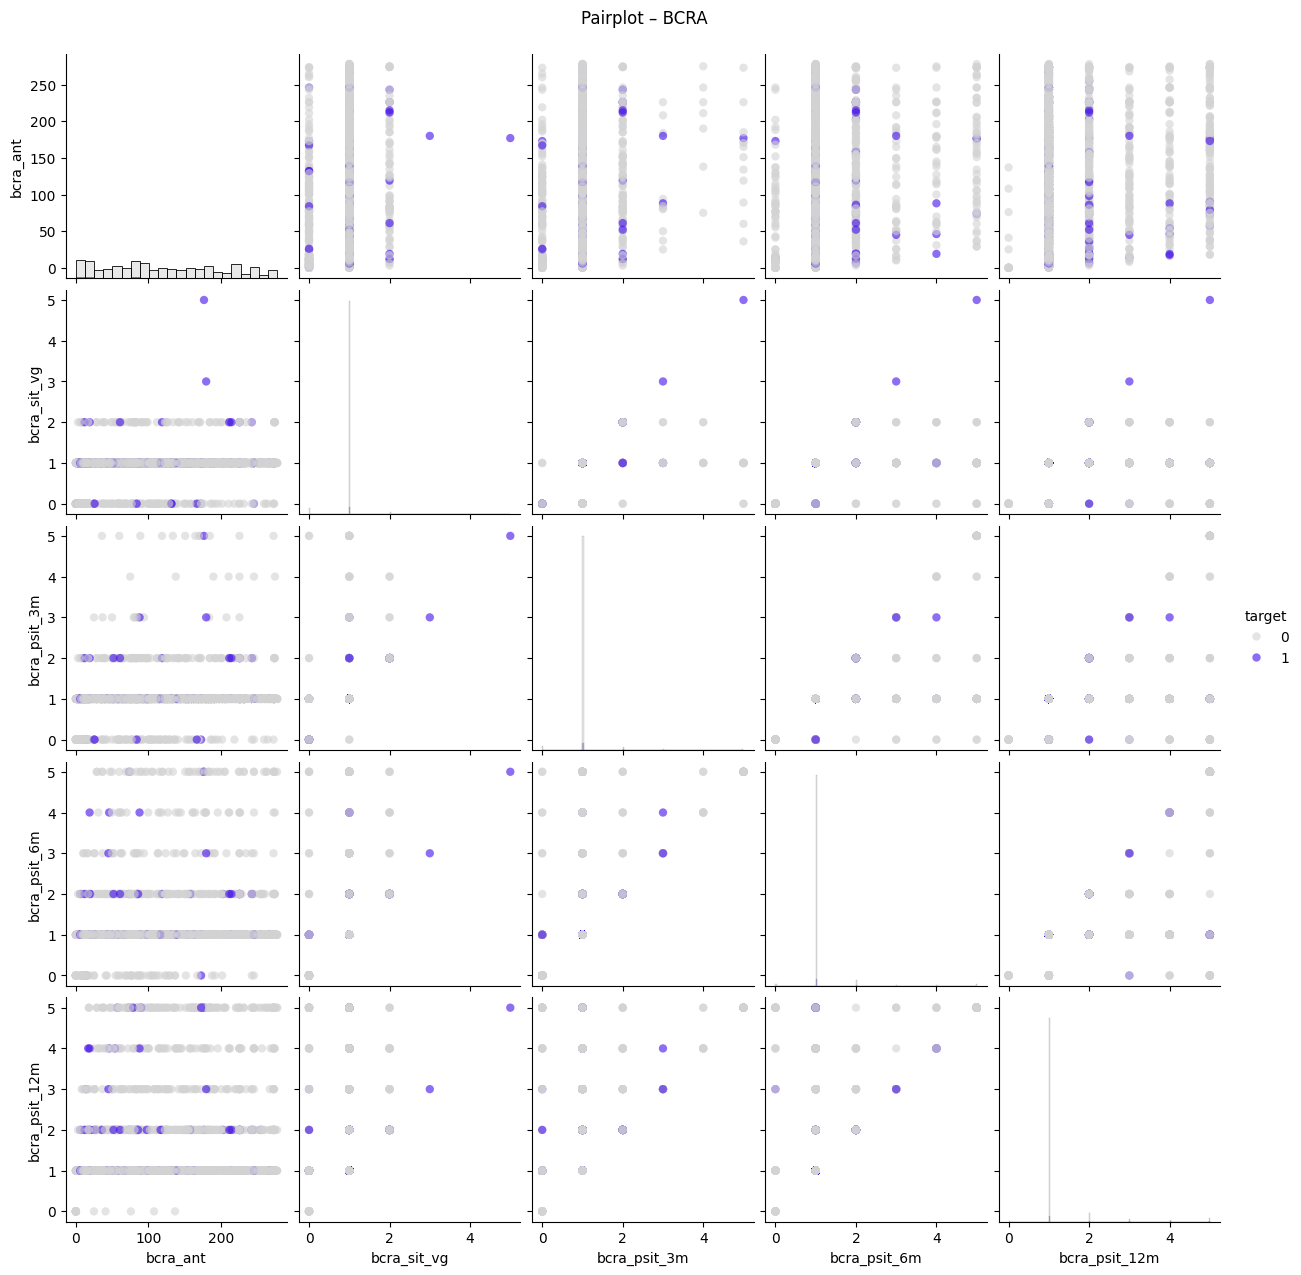

In [37]:
plot_pairplot(df_bcra, gname="BCRA")

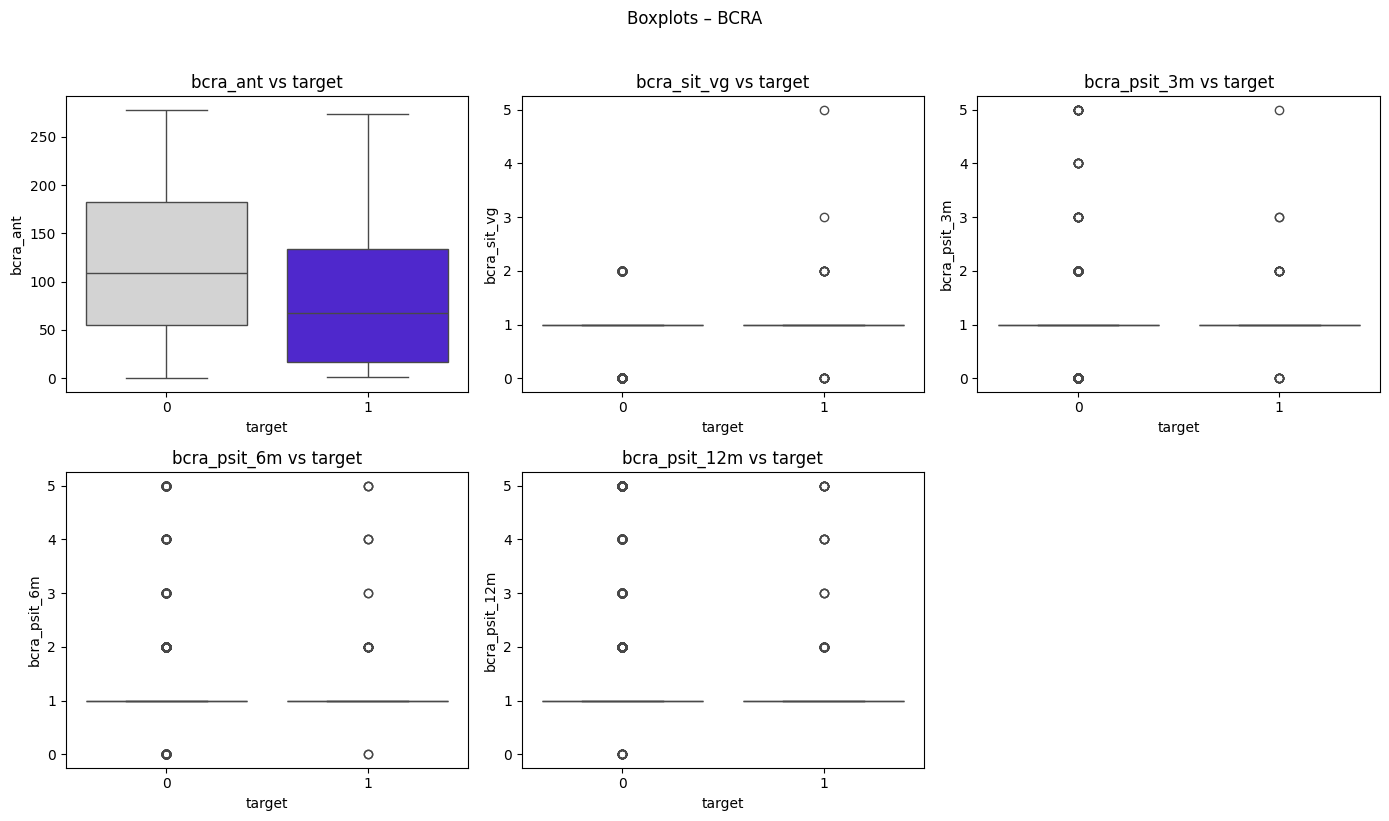

In [38]:
plot_boxplots(df_bcra, gname="BCRA")

In [39]:
df_bancarizacion = group_dfs['bancarizacion']
display(df_bancarizacion.head(1))

# Crosstabs para columnas binarias/categóricas.
ctabs = crosstabs_vs_target(df_bancarizacion)
for col, ct in ctabs.items():
    print(f'\n=== Crosstab {col} vs {TARGET_COL} ===')
    display(ct)

# Bins por cuantiles + tasa de default (para numéricas).
numeric_cols = [
    c for c in df_bancarizacion.columns
    if c not in [ID_COL, TARGET_COL] and pd.api.types.is_numeric_dtype(df_bancarizacion[c])
]

for col in numeric_cols:
    print(f'\n=== {col}: bins por cuantiles y default rate ===')
    display(binned_crosstab_vs_target(df_bancarizacion, col, q=10))

,id,target,bancrzdo,bco_cant,bco_endeu
0,1,0,1,0,0



=== Crosstab bancrzdo vs target ===


,0,1,All,default_rate
bancrzdo,,,,
0,19,0,19,0.000000
1,7778,250,8028,0.031141
All,7797,250,8047,NaN



=== bancrzdo: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 1.0]",7797,250,8047,0.031067
All,NaN,7797,250,8047,NaN



=== bco_cant: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 1.0]",4736,136,4872,0.027915
1,"[1.0, 2.0]",1967,68,2035,0.033415
2,"[2.0, 3.0]",693,25,718,0.034819
3,"[3.0, 13.0]",401,21,422,0.049763
All,NaN,7797,250,8047,NaN



=== bco_endeu: bins por cuantiles y default rate ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 4000.0]",776,32,808,0.039604
1,"[4000.0, 20000.0]",1296,70,1366,0.051245
2,"[20000.0, 27000.0]",253,10,263,0.038023
3,"[27000.0, 54000.0]",760,26,786,0.033079
4,"[54000.0, 93000.0]",785,25,810,0.030864
5,"[93000.0, 142004.8]",778,17,795,0.021384
6,"[142004.8, 214000.0]",794,18,812,0.022167
7,"[214000.0, 330000.0]",782,18,800,0.022500
8,"[330000.0, 601000.0]",787,16,803,0.019925


In [42]:
for col, ct in smart_crosstab_vs_target(
    df_bancarizacion,
    no_auto_bin=["bancrzdo"]
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== bancrzdo vs target ===


,0,1,All,default_rate
bancrzdo,,,,
0,19,0,19,0.000000
1,7778,250,8028,0.031141
All,7797,250,8047,NaN



=== bco_cant vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 1.0]",4736,136,4872,0.027915
1,"[1.0, 2.0]",1967,68,2035,0.033415
2,"[2.0, 3.0]",693,25,718,0.034819
3,"[3.0, 13.0]",401,21,422,0.049763
All,NaN,7797,250,8047,NaN



=== bco_endeu vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 4000.0]",776,32,808,0.039604
1,"[4000.0, 20000.0]",1296,70,1366,0.051245
2,"[20000.0, 27000.0]",253,10,263,0.038023
3,"[27000.0, 54000.0]",760,26,786,0.033079
4,"[54000.0, 93000.0]",785,25,810,0.030864
5,"[93000.0, 142004.8]",778,17,795,0.021384
6,"[142004.8, 214000.0]",794,18,812,0.022167
7,"[214000.0, 330000.0]",782,18,800,0.022500
8,"[330000.0, 601000.0]",787,16,803,0.019925


In [43]:
df_tarjetas = group_dfs['tarjetas']
display(df_tarjetas.head(1))

,id,target,tc_cant,tc_sdot
0,1,0,1,56000


In [44]:
for col, ct in smart_crosstab_vs_target(
    df_tarjetas,
    no_auto_bin=["tc_cant"]
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== tc_cant vs target ===


,0,1,All,default_rate
tc_cant,,,,
0,5873,199,6072,0.032773
1,1697,45,1742,0.025832
2,205,5,210,0.023810
3,21,1,22,0.045455
4,1,0,1,0.000000
All,7797,250,8047,NaN



=== tc_sdot vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 21000.0]",6235,209,6444,0.032433
1,"[21000.0, 88000.0]",773,30,803,0.037360
2,"[88000.0, 1264000.0]",789,11,800,0.013750
All,NaN,7797,250,8047,NaN


In [45]:
df_cheques_cant = group_dfs['cheques_cant']
display(df_cheques_cant.head(1))

,id,target,che_sf_cant_3m,che_sf_cant_6m,che_sf_mto_6m
0,1,0,0,0,0


In [49]:
for col, ct in smart_crosstab_vs_target(
    df_cheques_cant,
    no_auto_bin=["che_sf_cant_3m", 'che_sf_cant_6m', 'che_sf_mto_6m']
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== che_sf_cant_3m vs target ===


,0,1,All,default_rate
che_sf_cant_3m,,,,
0,7795,250,8045,0.031075
3,1,0,1,0.000000
7,1,0,1,0.000000
All,7797,250,8047,NaN



=== che_sf_cant_6m vs target ===


,0,1,All,default_rate
che_sf_cant_6m,,,,
0,7794,250,8044,0.031079
2,1,0,1,0.000000
3,1,0,1,0.000000
7,1,0,1,0.000000
All,7797,250,8047,NaN



=== che_sf_mto_6m vs target ===


,0,1,All,default_rate
che_sf_mto_6m,,,,
0,7794,250,8044,0.031079
80000,1,0,1,0.000000
1186000,1,0,1,0.000000
3663122,1,0,1,0.000000
All,7797,250,8047,NaN


In [50]:
df_cheques_mto = group_dfs['cheques_mto']
display(df_cheques_mto.head(1))

,id,target,che_sf_mto_3m,che_sf_mto_6m
0,1,0,0,0


In [52]:
for col, ct in smart_crosstab_vs_target(
    df_cheques_mto,
    no_auto_bin=["che_sf_mto_3m", 'che_sf_mto_6m']
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== che_sf_mto_3m vs target ===


,0,1,All,default_rate
che_sf_mto_3m,,,,
0,7795,250,8045,0.031075
1186000,1,0,1,0.000000
3663122,1,0,1,0.000000
All,7797,250,8047,NaN



=== che_sf_mto_6m vs target ===


,0,1,All,default_rate
che_sf_mto_6m,,,,
0,7794,250,8044,0.031079
80000,1,0,1,0.000000
1186000,1,0,1,0.000000
3663122,1,0,1,0.000000
All,7797,250,8047,NaN


In [53]:
df_prestamos_cant = group_dfs['prestamos_cant']
display(df_prestamos_cant.head(1))

,id,target,pre_pre_cant,pre_pre_sldo,pre_hip_cant,pre_hip_sldo,pre_per_cant,pre_per_sldo,pre_otr_cant,pre_otr_sldo
0,1,0,0,0,0,0,0,0,0,0


In [ ]:
for col, ct in smart_crosstab_vs_target(
    df_prestamos_cant,
    =['pre_pre_cant', 'pre_pre_sldo'	'pre_hip_cant'	'pre_hip_sldo'	'pre_per_cant'	'pre_per_sldo'	'pre_otr_cant'	'pre_otr_sldo']
):
    print(f"\n=== {col} vs {TARGET_COL} ===")
    display(ct)


=== pre_pre_cant vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 2.0]",7797,250,8047,0.031067
All,NaN,7797,250,8047,NaN



=== pre_pre_sldo vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 15239178.0]",7797,250,8047,0.031067
All,NaN,7797,250,8047,NaN



=== pre_hip_cant vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 2.0]",7797,250,8047,0.031067
All,NaN,7797,250,8047,NaN



=== pre_hip_sldo vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 24000000.0]",7797,250,8047,0.031067
All,NaN,7797,250,8047,NaN



=== pre_per_cant vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 1.0]",7580,241,7821,0.030814
1,"[1.0, 6.0]",217,9,226,0.039823
All,NaN,7797,250,8047,NaN



=== pre_per_sldo vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 129873.2]",7023,219,7242,0.030240
1,"[129873.2, 3188000.0]",774,31,805,0.038509
All,NaN,7797,250,8047,NaN



=== pre_otr_cant vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 1.0]",7052,194,7246,0.026773
1,"[1.0, 7.0]",745,56,801,0.069913
All,NaN,7797,250,8047,NaN



=== pre_otr_sldo vs target ===


,bin_interval,0,1,All,default_rate
bin_num,,,,,
0,"[-0.0, 3000.0]",4776,93,4869,0.019100
1,"[3000.0, 14530.4]",726,38,764,0.049738
2,"[14530.4, 36000.0]",782,47,829,0.056695
3,"[36000.0, 102400.0]",740,40,780,0.051282
4,"[102400.0, 18975000.0]",773,32,805,0.039752
All,NaN,7797,250,8047,NaN
